In [33]:
import pandas as pd

# Load your data
df = pd.read_csv(r"C:\Users\Sosa the chief\Desktop\python\portfolio\Sales forecasting\train.csv")

# 1. Report the number of NaNs before cleaning
print("Initial NaN count in each column:")
print(df.isna().sum())

# Drop rows where the 'PostalCode' column has NaN values
df.dropna(subset=['Postal Code'], inplace=True)

# Verify if there are any NaN values left in the 'PostalCode' column
if df['Postal Code'].isnull().sum() == 0:
    print("All NaN values have been removed from the PostalCode column.")
else:
    print("There are still NaN values in the PostalCode column.")
    
# Optional: print the first few rows to check the cleaned column
print(df.head())


Initial NaN count in each column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
All NaN values have been removed from the PostalCode column.
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country 

In [38]:
# Drop irrelevant columns, ignoring any that are not found in the DataFrame
columns_to_drop = ['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID', 'Country', 'Product Name']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the first few rows of the cleaned dataset
print("Dataset after dropping irrelevant columns:")
print(df.head())

# Inspect unique values for categorical columns
categorical_columns = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Dataset after dropping irrelevant columns:
   Order Date   Ship Date       Ship Mode    Segment             City  \
0  08/11/2017  11/11/2017    Second Class   Consumer        Henderson   
1  08/11/2017  11/11/2017    Second Class   Consumer        Henderson   
2  12/06/2017  16/06/2017    Second Class  Corporate      Los Angeles   
3  11/10/2016  18/10/2016  Standard Class   Consumer  Fort Lauderdale   
4  11/10/2016  18/10/2016  Standard Class   Consumer  Fort Lauderdale   

        State  Postal Code Region         Category Sub-Category     Sales  
0    Kentucky      42420.0  South        Furniture    Bookcases  261.9600  
1    Kentucky      42420.0  South        Furniture       Chairs  731.9400  
2  California      90036.0   West  Office Supplies       Labels   14.6200  
3     Florida      33311.0  South        Furniture       Tables  957.5775  
4     Florida      33311.0  South  Office Supplies      Storage   22.3680  

Unique values in 'Ship Mode':
['Second Class' 'Standard Class

Daily Sales Data:
                Sales
Order Date           
01/01/2018  1481.8280
01/02/2015   468.9000
01/02/2017   161.9700
01/03/2015  2203.1510
01/03/2016  1642.1744


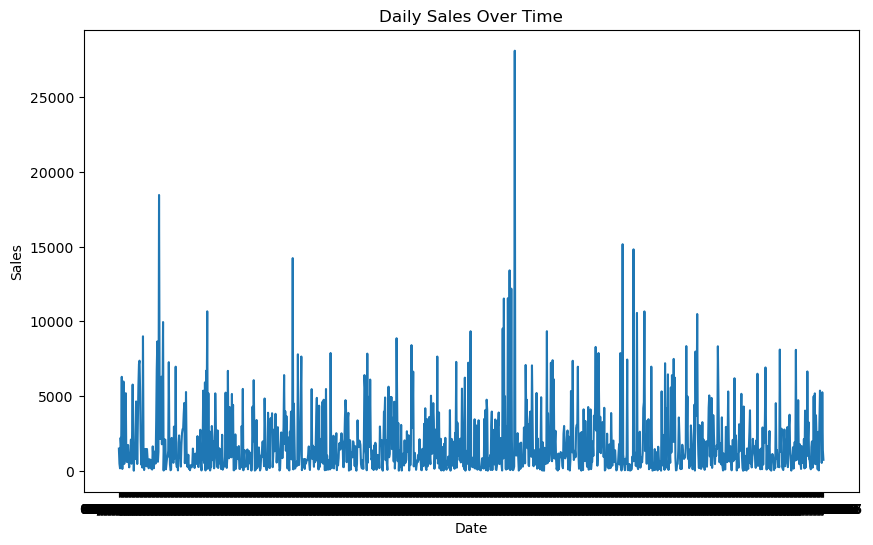

In [39]:
# Aggregate sales by day to create a daily sales time series
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# Set 'Order Date' as the index for time series operations
daily_sales.set_index('Order Date', inplace=True)

# Display the first few rows of the daily sales data
print("Daily Sales Data:")
print(daily_sales.head())

# Optional: plot to visualize the time series (requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales['Sales'])
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

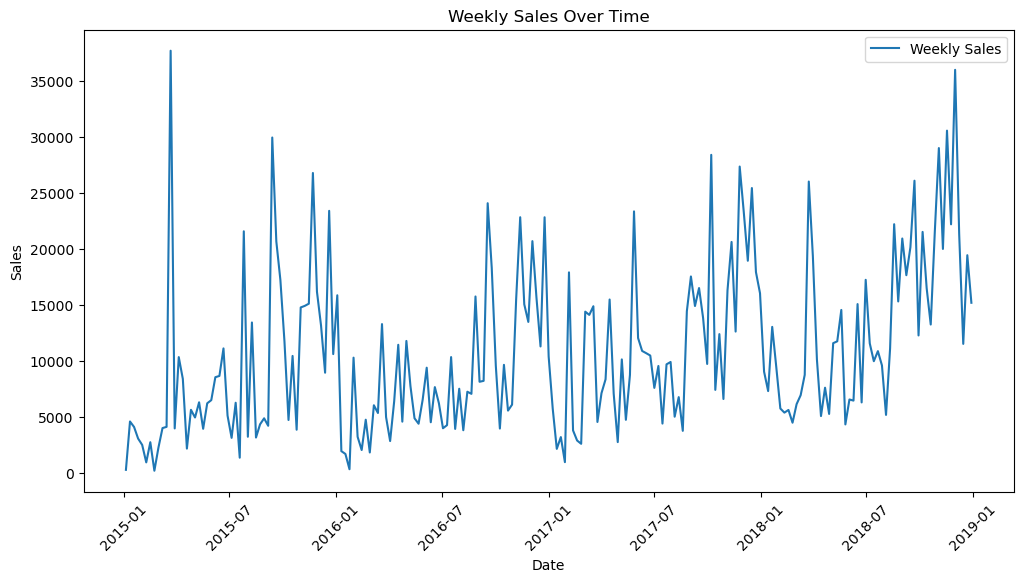

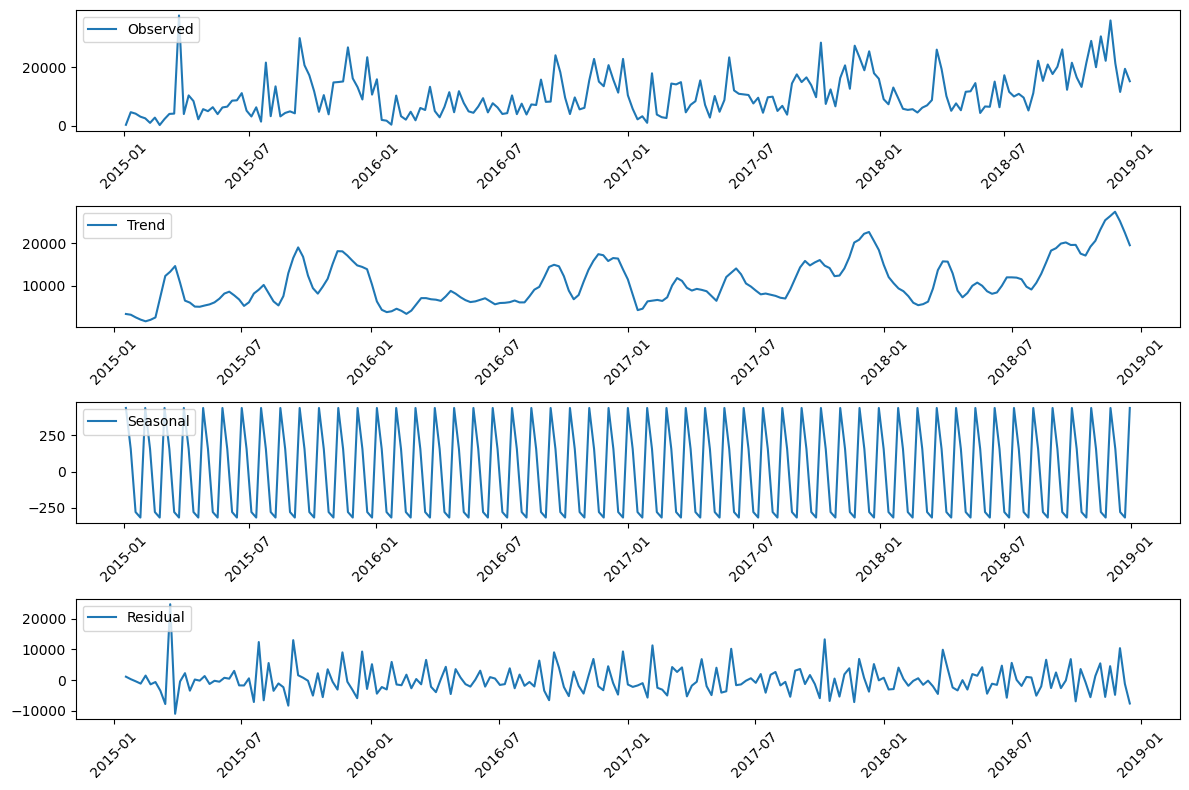

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'daily_sales' DataFrame is already created and indexed by 'Order Date'

# Option 1: Resample to weekly to reduce the number of points
weekly_sales = daily_sales.resample('W').sum()

# Plot the resampled time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales['Sales'], label='Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate date labels for readability
plt.legend()
plt.show()

# Seasonal decomposition on resampled data (use 'W' for weekly seasonality)
decomposition = seasonal_decompose(weekly_sales['Sales'], model='additive', period=4)  # Adjust period for weekly seasonality

# Plot decomposed components with weekly aggregation
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


ADF Statistic: -8.695530838099016
p-value: 3.9344599440070055e-14


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

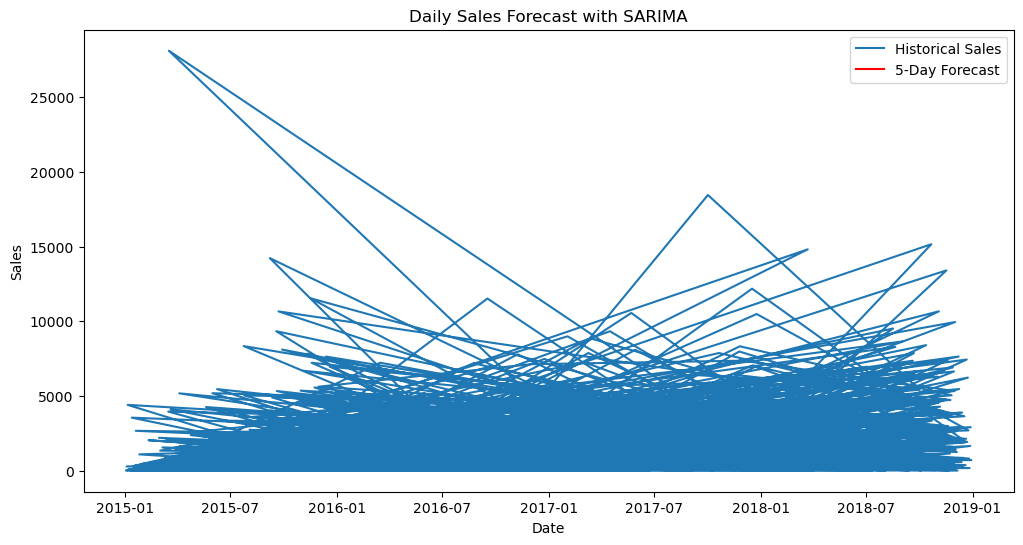

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Assuming 'daily_sales' is your DataFrame with 'Order Date' as index and 'Sales' column

# Check if the data is stationary with the Augmented Dickey-Fuller test
result = adfuller(daily_sales['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# If the data is not stationary (p-value > 0.05), differencing might be required for SARIMA

# Set up SARIMA model
# Parameters (p, d, q, P, D, Q, s) depend on the data; here’s a typical setup:
# p, d, q are non-seasonal orders; P, D, Q are seasonal orders; s is the seasonal period

# Example parameters (adjust as needed based on performance)
model = SARIMAX(daily_sales['Sales'],
                order=(1, 1, 1),            # (p, d, q) - adjust based on your data
                seasonal_order=(1, 1, 1, 7),  # (P, D, Q, s) - s=7 for weekly seasonality
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Forecast for the next 5 days
forecast = sarima_result.get_forecast(steps=5)
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=5)
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df, label='5-Day Forecast', color='red')
plt.title('Daily Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [62]:
# Ensure the index is in datetime format and has a daily frequency
daily_sales.index = pd.to_datetime(daily_sales.index, dayfirst=True)
daily_sales = daily_sales.asfreq('D')  # Set frequency to daily
daily_sales = daily_sales.sort_index()  # Sort the index if not already sorted
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Ensure the index is in datetime format and set frequency to daily
daily_sales.index = pd.to_datetime(daily_sales.index, dayfirst=True)
daily_sales = daily_sales.asfreq('D')
daily_sales = daily_sales.sort_index()

# Check for stationarity (as you already did) - this confirms that differencing might not be needed
result = adfuller(daily_sales['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Set up and fit the SARIMA model
model = SARIMAX(daily_sales['Sales'],
                order=(1, 0, 1),            # Adjust (p, d, q) as needed, `d=0` if data is stationary
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality (P, D, Q, 7)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Forecast for the next 5 days
forecast = sarima_result.get_forecast(steps=5)
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df, label='5-Day Forecast', color='red')
plt.title('Daily Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


MissingDataError: exog contains inf or nans

In [65]:
print(df.isna().sum())
# Check for NaN values across the entire dataset
nan_count_total = daily_sales.isna().sum().sum()
print(f"Total number of NaN values in the entire dataset: {nan_count_total}")

# Optionally, report NaNs for each column
nan_count_per_column = daily_sales.isna().sum()
print("Number of NaN values per column:")
print(nan_count_per_column)


Order Date      0
Ship Date       0
Ship Mode       0
Segment         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
dtype: int64
Total number of NaN values in the entire dataset: 229
Number of NaN values per column:
Sales    229
dtype: int64


In [66]:
# Calculate the average sales value, excluding NaNs
average_sales = daily_sales['Sales'].mean()

# Fill NaN values in the Sales column with the average sales value
daily_sales['Sales'] = daily_sales['Sales'].fillna(average_sales)

# Confirm that no NaNs remain after filling
print("Number of NaN values after filling:", daily_sales['Sales'].isna().sum())


Number of NaN values after filling: 0


ADF Statistic: -6.154525298973172
p-value: 7.423707243336862e-08


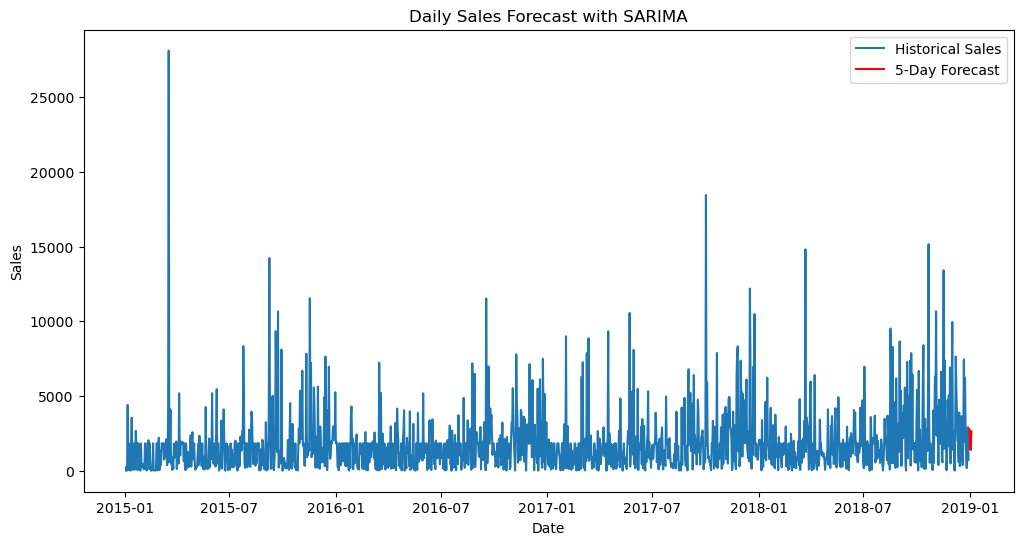

In [67]:
# Ensure the index is in datetime format and has a daily frequency
daily_sales.index = pd.to_datetime(daily_sales.index, dayfirst=True)
daily_sales = daily_sales.asfreq('D')  # Set frequency to daily
daily_sales = daily_sales.sort_index()  # Sort the index if not already sorted
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Ensure the index is in datetime format and set frequency to daily
daily_sales.index = pd.to_datetime(daily_sales.index, dayfirst=True)
daily_sales = daily_sales.asfreq('D')
daily_sales = daily_sales.sort_index()

# Check for stationarity (as you already did) - this confirms that differencing might not be needed
result = adfuller(daily_sales['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Set up and fit the SARIMA model
model = SARIMAX(daily_sales['Sales'],
                order=(1, 0, 1),            # Adjust (p, d, q) as needed, `d=0` if data is stationary
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality (P, D, Q, 7)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Forecast for the next 5 days
forecast = sarima_result.get_forecast(steps=5)
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')
forecast_df = pd.DataFrame({'Forecast': forecast.predicted_mean}, index=forecast_index)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Sales'], label='Historical Sales')
plt.plot(forecast_df, label='5-Day Forecast', color='red')
plt.title('Daily Sales Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [68]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming daily_sales is your DataFrame with 'Order Date' as index and 'Sales' column

# Prepare data as before (filling NaNs with the average)
average_sales = daily_sales['Sales'].mean()
daily_sales['Sales'] = daily_sales['Sales'].fillna(average_sales)

# Set up and fit the SARIMA model
model = SARIMAX(daily_sales['Sales'],
                order=(1, 0, 1),            # Adjust (p, d, q) as needed
                seasonal_order=(1, 1, 1, 7),  # Weekly seasonality (P, D, Q, 7)
                enforce_stationarity=False,
                enforce_invertibility=False)

# Fit the model
sarima_result = model.fit(disp=False)

# Forecast for the next 5 days
forecast = sarima_result.get_forecast(steps=5)
forecast_index = pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# Create a DataFrame to display forecasted values
forecast_df = pd.DataFrame({
    'Date': forecast_index,
    'Forecasted Sales': forecast.predicted_mean
}).set_index('Date')

# Display the forecasted values
print("5-Day Forecasted Sales:")
print(forecast_df)


5-Day Forecasted Sales:
            Forecasted Sales
Date                        
2018-12-31       2798.171214
2019-01-01       2736.716869
2019-01-02       1433.549415
2019-01-03       1399.436767
2019-01-04       2633.781948
